# Assignment: 

  - Perform initial preprocessing of data
  - Perform preprocessing for statsmodels
  - Run the model in statsmodels and produce a results summary
  - Evaluate the model on the test set

Dataset Link:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# Data Dictionary

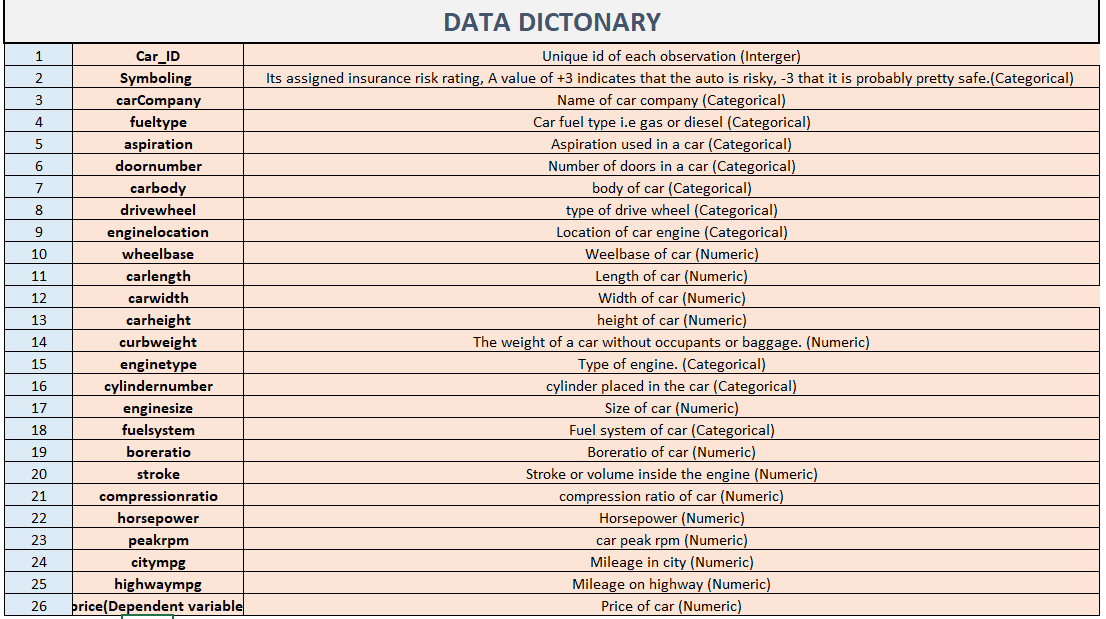

## Import Libraries

In [1]:
## Standard Statsmodels import
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-talk'])
# pd.set_option('display.max_columns',25)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_14136\3900563112.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-talk'])


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
## fixing random for lesson generation
np.random.seed(321)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

## Load Data

In [3]:
## load data
df = pd.read_csv('Data/CarPrice.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.shape

(205, 26)

In [5]:
## checking for null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

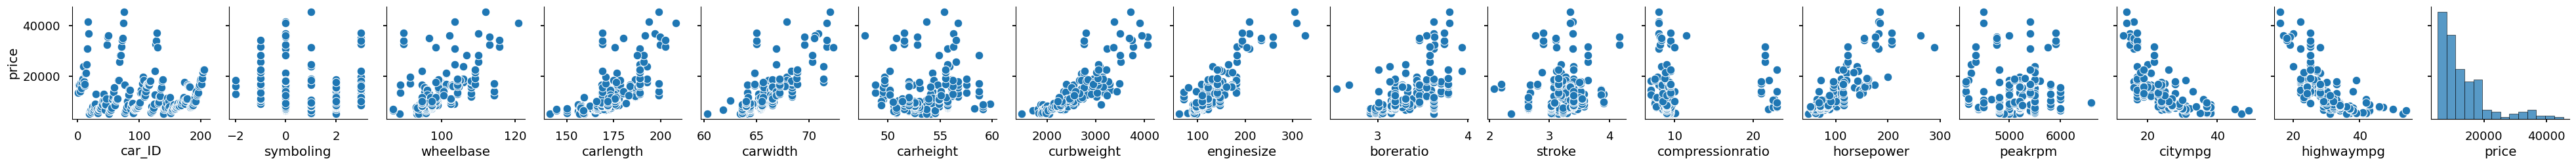

In [6]:
## Quick EDA for cols related to target
sns.pairplot(df,y_vars='price');

In [7]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
df['compressionratio'].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compressionratio, dtype: int64

## The 4 Assumptions of a Linear Regression are:

1. Linearity:
That the input features have a linear relationship with the target.
2. Independence of features (AKA Little-to-No Multicollinearity)
That the features are not strongly related to other features.
3. Normality:
The model's residuals are approximately normally distributed.
4. Homoscedasticity
The model residuals have equal variance across all predictions.

### 1.  Checking for the Assumption of Linearity

In [9]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='price'))
len(cols)

15

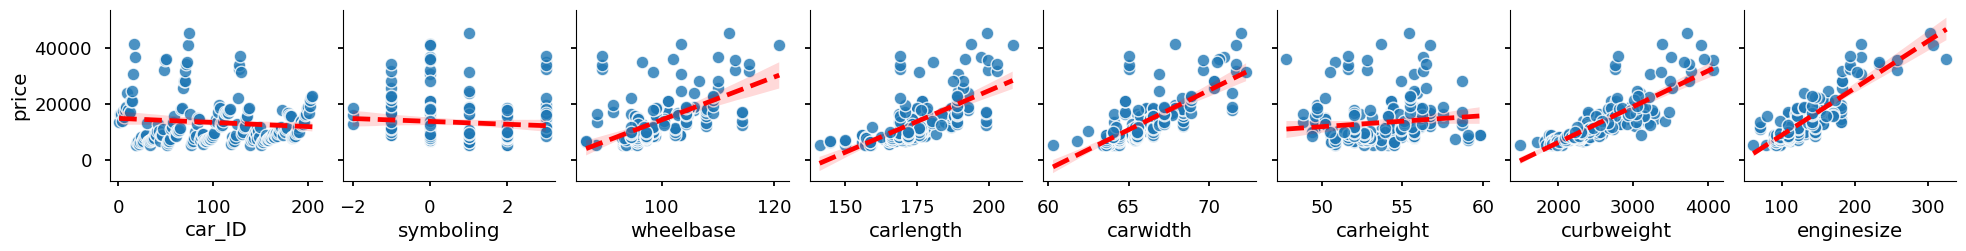

In [10]:
## Making a pairplot with regression lines
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[:8],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

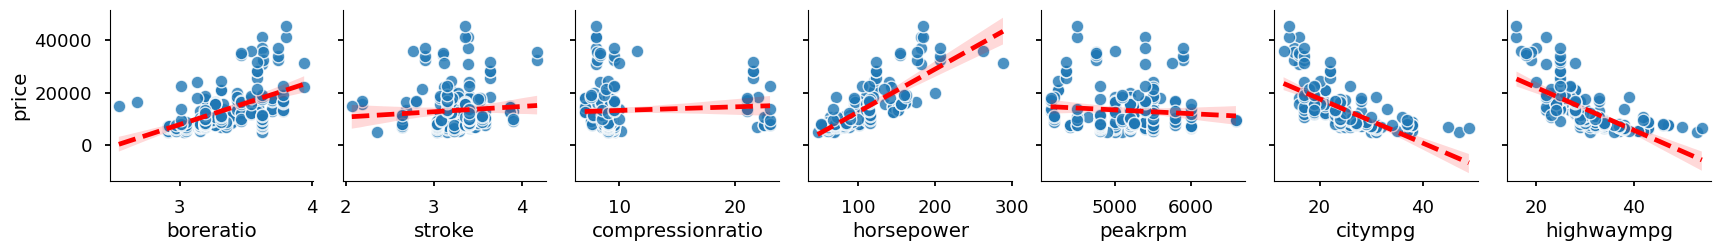

In [11]:
## Making a pairplot with regression lines
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[8:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

In [12]:
## dropping nonlinear features
df = df.drop(columns=['stroke','compressionratio','peakrpm','carheight','car_ID','symboling'])

- We can move forward, having met the assumption of linearity.

### 2. Checking for the Assumption of Little-to-No Multicollinearity

In [13]:
## Calc abs values of correlations
corr = df.drop(columns='price').corr().abs()
corr

C:\Users\Melissa\AppData\Local\Temp\ipykernel_14136\3506136149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.470414,0.544082
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.670909,0.704662
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.642704,0.677218
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.757414,0.797465
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.653658,0.677470
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.584532,0.587012
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.801456,0.770544
citympg,0.470414,0.670909,0.642704,0.757414,0.653658,0.584532,0.801456,1.000000,0.971337
highwaympg,0.544082,0.704662,0.677218,0.797465,0.677470,0.587012,0.770544,0.971337,1.000000


C:\Users\Melissa\AppData\Local\Temp\ipykernel_14136\940383258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


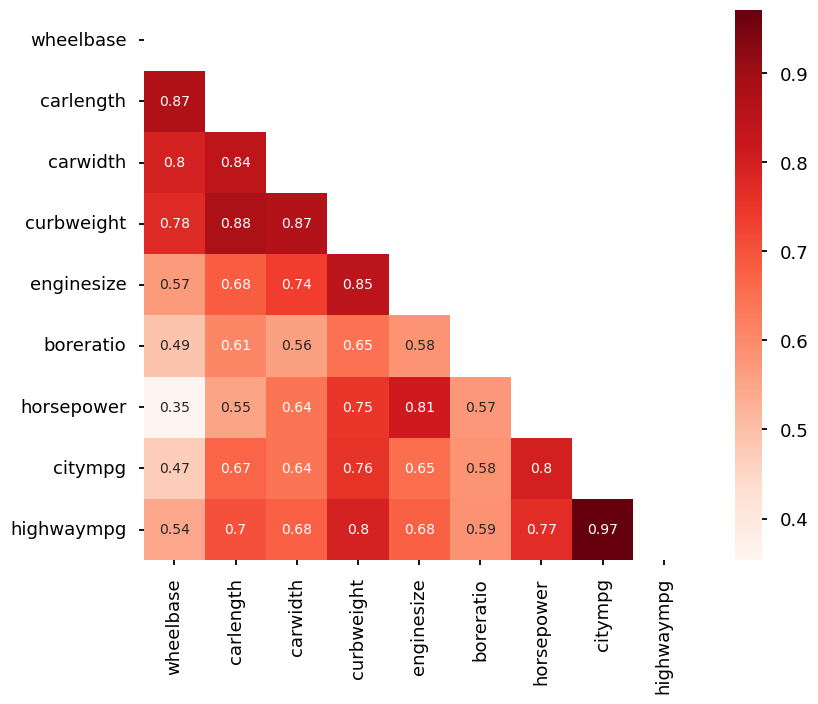

In [14]:
## Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [15]:
## Dropping the column showing high corelation
df = df.drop(columns=['citympg', 'wheelbase', 'carlength', 'curbweight', 'horsepower'])

C:\Users\Melissa\AppData\Local\Temp\ipykernel_14136\2046423489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


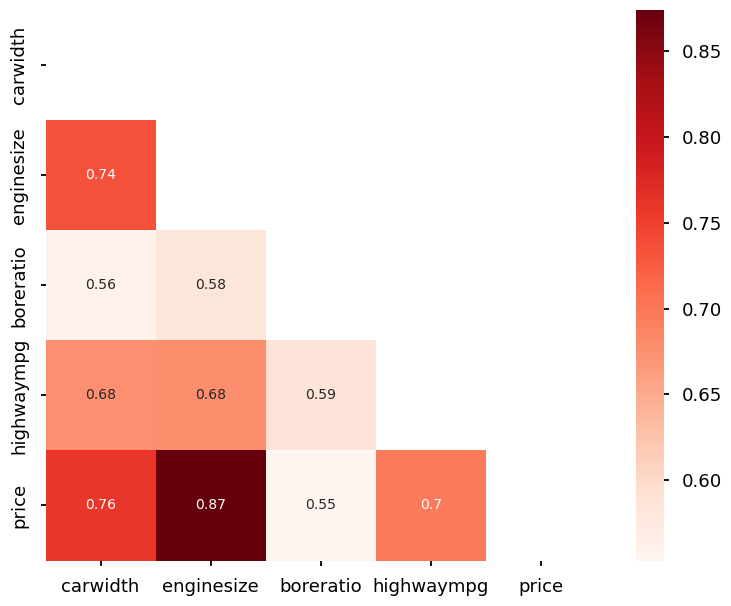

In [16]:
## Adding price back to the correlation heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

C:\Users\Melissa\AppData\Local\Temp\ipykernel_14136\940383258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


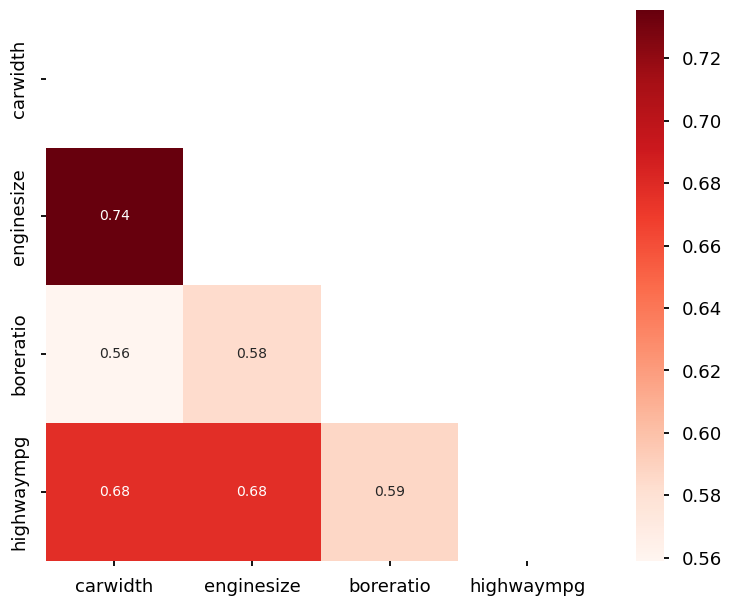

In [17]:
## Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

- No more correlations above 0.8

## Preprocess for Modeling

In [18]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,highwaympg
17,bmw x3,gas,std,four,sedan,rwd,front,70.9,ohc,six,209,mpfi,3.62,20
39,honda prelude,gas,std,four,sedan,fwd,front,65.2,ohc,four,110,1bbl,3.15,33
40,honda accord,gas,std,four,sedan,fwd,front,62.5,ohc,four,110,1bbl,3.15,33
47,jaguar xj,gas,std,four,sedan,rwd,front,69.6,dohc,six,258,mpfi,3.63,19
123,plymouth valiant,gas,std,four,wagon,fwd,front,64.6,ohc,four,122,2bbl,3.35,30


In [19]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [20]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['carwidth', 'enginesize', 'boreratio', 'highwaympg']

In [21]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

## Preparing the Data for OLS Model

In [22]:
## fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['carwidth', 'enginesize', 'boreratio',
                                  'highwaympg'])])

In [23]:
pd.DataFrame(preprocessor.transform(X_train).round(3))

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.366,1.946,1.104,-1.518
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.327,-0.390,-0.678,0.318
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.602,-0.390,-0.678,0.318
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.752,3.102,1.142,-1.659
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.610,-0.107,0.081,-0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.421,0.341,1.711,-0.388
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.327,-0.390,-0.678,-0.388
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.941,-0.815,-1.588,1.025
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.193,0.695,0.990,-0.953


In [24]:
## Create the empty list
final_features = []

In [25]:
## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [26]:
## A) Using named steps dictionary to find the encoder - Part 1
preprocessor.named_transformers_['pipeline-1'].named_steps

{'simpleimputer': SimpleImputer(fill_value='MISSING', strategy='constant'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [27]:
## A) Using named steps dictionary to find the encoder - Part 2
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']

In [28]:
## Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 5000',
       'CarName_audi 5000s (diesel)', 'CarName_audi fox',
       'CarName_bmw 320i', 'CarName_bmw x1', 'CarName_bmw x3',
       'CarName_bmw x5', 'CarName_bmw z4', 'CarName_buick century',
       'CarName_buick century luxus (sw)',
       'CarName_buick century special', 'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skylark',
       'CarName_chevrolet impala', 'CarName_chevrolet monte carlo',
       'CarName_chevrolet vega 2300', 'CarName_dodge challenger se',
       'CarName_dodge colt (sw)', 'CarName_dodge coronet custom',
       'CarName_dodge coronet custom (sw)', 'CarName_dodge d200',
       'CarName_dodge rampage', 'CarName_honda accord',
       'CarName_honda accord cvcc', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1300',
       'CarName_honda civic 

In [29]:
## Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

In [30]:
num_cols

['carwidth', 'enginesize', 'boreratio', 'highwaympg']

In [31]:
## adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

## Transforming X_train and X_test and remaking DataFrames

In [32]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carwidth,enginesize,boreratio,highwaympg
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.366225,1.945552,1.104185,-1.517697
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.326695,-0.390498,-0.677725,0.318495
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.602289,-0.390498,-0.677725,0.318495
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.752050,3.101778,1.142097,-1.658942
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.610161,-0.107341,0.080534,-0.105242


In [33]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carwidth,enginesize,boreratio,highwaympg
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.752050,3.101778,1.142097,-1.658942
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.618189,0.340992,1.710792,-0.387733
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.232207,-0.437691,1.104185,-0.246487
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.799137,-0.838831,-1.132681,1.024722
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.326695,-0.154534,0.004708,0.459740


In [34]:
## Demo of adding a constant to X_train (not rewriting the df yet-confirming expected results first)
sm.add_constant(X_train_df, prepend=False, has_constant='add').head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carwidth,enginesize,boreratio,highwaympg,const
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,2.366225,1.945552,1.104185,-1.517697,1.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.326695,-0.390498,-0.677725,0.318495,1.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.602289,-0.390498,-0.677725,0.318495,1.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.752050,3.101778,1.142097,-1.658942,1.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.610161,-0.107341,0.080534,-0.105242,1.0


In [35]:
## Overwrite 
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carwidth,enginesize,boreratio,highwaympg,const
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,2.366225,1.945552,1.104185,-1.517697,1.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.326695,-0.390498,-0.677725,0.318495,1.0


,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carwidth,enginesize,boreratio,highwaympg,const
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.752050,3.101778,1.142097,-1.658942,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.618189,0.340992,1.710792,-0.387733,1.0


###### Fitting OLS in Statsmodels

In [36]:
## instantiate an OLS model WITH the training data.
# hasconst=True is the default, but showing for demo
model = sm.OLS(y_train, X_train_df, hasconst=True)

In [37]:
# Fitting the model (no data in .fit) and saving the result as new var
result = model.fit()

## Evaluate

In [38]:
## get model performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     29.30
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.22e-11
Time:                        17:08:25   Log-Likelihood:                -1173.5
No. Observations:                 153   AIC:                             2617.
Df Residuals:                      18   BIC:                             3026.
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_alfa-romero giulia              -2878.3328   1826.894     -1.576      0.133   -6716.494     959.828
CarName_alfa-romero stelvio               126.6672   1826.894      0.069      0.945   -3711.494    3964.828
CarName_audi 100 ls                      2829.7772   1710.415      1.654      0.115    -763.672    6423.226
CarName_audi 100ls                      -5354.1103   3561.606     -1.503      0.150   -1.28e+04    2128.546
CarName_audi 5000                        2510.4342   2886.259      0.870      0.396   -3553.371    8574.240
CarName_audi 5000s (diesel)             -4860.1563   3000.641     -1.620      0.123   -1.12e+04    1443.957
CarName_audi fox                         2587.9198   2070.871      1.250      0.227   -1762.820    6938.659
CarName_bmw 320i                         6718.6763   1734.794      3.873      0.001    3074.009    1.04e+04
CarName_bmw x1                           1.179e+04   3039.102      3.878      0.001    5401.229    1.82e+04
CarName_bmw x3                           1.215e+04   2698.119      4.505      0.000    6485.234    1.78e+04
CarName_bmw x5                            2.42e+04   2920.362      8.286      0.000    1.81e+04    3.03e+04
CarName_bmw z4                           1.086e+04   2924.697      3.712      0.002    4711.230     1.7e+04
CarName_buick century                    3564.0761   2668.909      1.335      0.198   -2043.094    9171.247
CarName_buick century luxus (sw)         4821.2887   3003.396      1.605      0.126   -1488.612    1.11e+04
CarName_buick century special           -2713.4797   2370.783     -1.145      0.267   -7694.310    2267.351
CarName_buick opel isuzu deluxe         -2488.9309   1617.785     -1.538      0.141   -5887.771     909.910
CarName_buick regal sport coupe (turbo)  5161.0870   2723.546      1.895      0.074    -560.871    1.09e+04
CarName_buick skylark                    1024.5087   1547.821      0.662      0.516   -2227.342    4276.359
CarName_chevrolet impala                 4188.1860   1747.886      2.396      0.028     516.014    7860.358
CarName_chevrolet monte carlo           -1006.4769   1882.126     -0.535      0.599   -4960.676    2947.722
CarName_chevrolet vega 2300             -2259.1758   1785.833     -1.265      0.222   -6011.071    1492.719
CarName_dodge challenger se             -1614.1379   1735.310     -0.930      0.365   -5259.889    2031.614
CarName_dodge colt (sw)                 -1914.8368   1662.889     -1.152      0.265   -5408.438    1578.764
CarName_dodge coronet custom             2971.2781   2591.361      1.147      0.267   -2472.968    8415.525
CarName_dodge coronet custom (sw)        -512.0070    947.960     -0.540      0.596   -2503.598    1479.584
CarName_dodge d200                       2178.0699   2358.3

## Evaluate on Test Set

In [39]:
# after fitting statsmodels, use the result variable with .predict()
test_preds = result.predict(X_test_df)

In [40]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')

### Finding the Residuals

In [42]:
# To get our residuals from statsmodels and preview first 5
resid = result.resid
resid.head()

17     1.957534e+03
39     3.637979e-11
40     2.172791e+03
47     3.637979e-12
123    1.818989e-11
dtype: float64

## 3. Checking the Assumption of Normality with Q-Q Plots

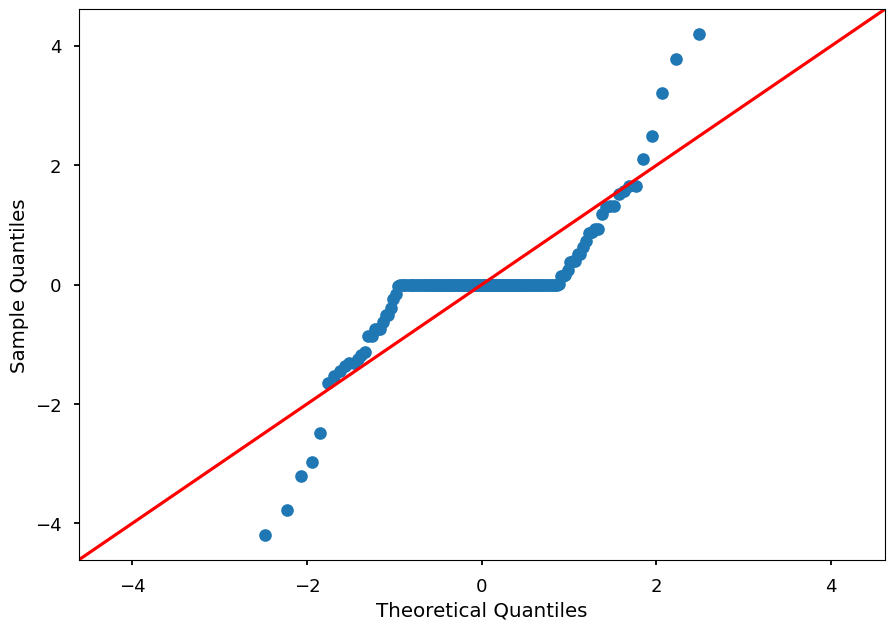

In [43]:
sm.graphics.qqplot(resid,line='45',fit=True);

## 4. Checking Assumption of Homoscedasticity

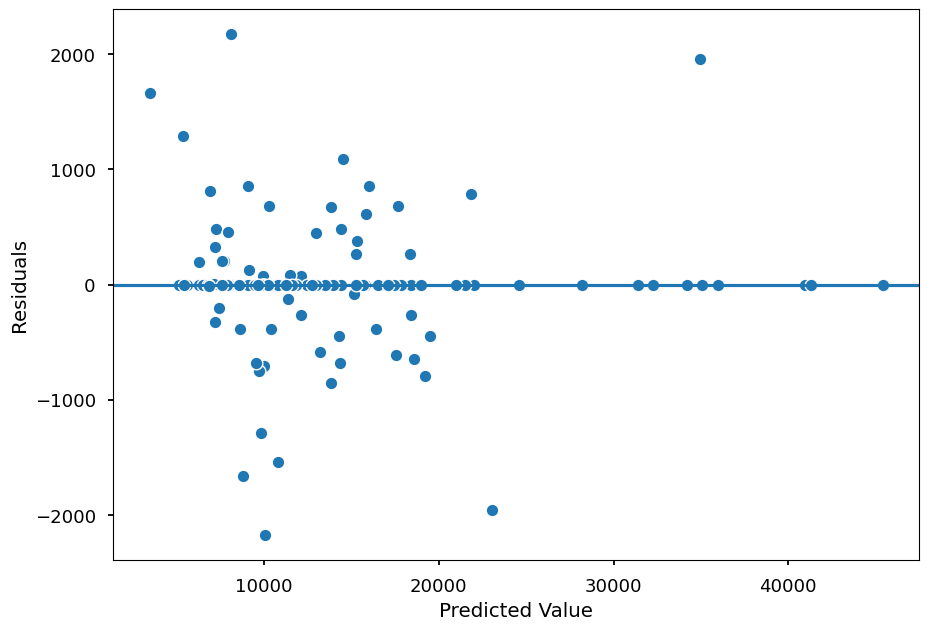

In [44]:
## Get predictions and calculate residuals
y_pred = result.predict(X_train_df)
resid = y_train -  y_pred
## Plot predicitons vs resids
fig, ax = plt.subplots()
ax.scatter(y_pred,resid,ec='white',lw=1)
ax.axhline(0)
ax.set(ylabel='Residuals',xlabel='Predicted Value');

### Removing Outliers

In [45]:
scaler = StandardScaler()
z_price = scaler.fit_transform(y_train.values.reshape(-1,1))
z_price

array([[ 3.10591049],
       [-0.54747299],
       [-0.35851611],
       [ 2.50255164],
       [-0.53756904],
       [ 0.69039003],
       [-0.97399427],
       [-0.7228771 ],
       [-0.86909063],
       [-0.30599913],
       [-0.82804137],
       [-1.02312306],
       [ 0.10605718],
       [-0.23432583],
       [-0.74946137],
       [-0.59256201],
       [ 0.76545152],
       [ 0.7817409 ],
       [-0.39852284],
       [-0.39761064],
       [ 0.69755736],
       [ 1.16916766],
       [ 0.02004922],
       [ 0.72635699],
       [-0.0543607 ],
       [-0.49091624],
       [-0.97399427],
       [-0.31942159],
       [-0.45716463],
       [-0.70854244],
       [ 0.50547292],
       [ 0.18802537],
       [-0.40217167],
       [-0.85462565],
       [-0.35200036],
       [-0.66319279],
       [-0.11417532],
       [ 0.6651089 ],
       [ 2.75458101],
       [ 0.04806696],
       [-0.53405054],
       [-0.40230198],
       [ 0.38467083],
       [-0.62657425],
       [ 0.17629701],
       [-1

In [46]:
z_price = pd.Series(z_price.flatten(),index=y_train.index )
z_price

17     3.105910
39    -0.547473
40    -0.358516
47     2.502552
123   -0.537569
         ...   
200    0.495048
41    -0.013181
31    -0.806800
124   -0.036768
26    -0.708542
Length: 153, dtype: float64

In [48]:
## saving the true/false result as our outlier index
idx_outliers= z_price>3
idx_outliers

17      True
39     False
40     False
47     False
123    False
       ...  
200    False
41     False
31     False
124    False
26     False
Length: 153, dtype: bool

In [49]:
## How many outliers did we find?
idx_outliers.sum()

4

In [50]:
## saving a cleaned version of y_train and X_train with outliers removed
y_train_cln = y_train[~idx_outliers]
X_train_cln = X_train_df[~idx_outliers]

In [51]:
print(f"Our model includes cars priced:")
print(f"- Greater than ${y_train_cln.min():,.2f}")
print(f"- Less than ${y_train_cln.max():,.2f}")

Our model includes cars priced:
- Greater than $5,118.00
- Less than $36,000.00


### Remove Outliers from Test Data

In [52]:
# Getting scaled y_test
z_price_test = scaler.transform(y_test.values.reshape(-1,1))
z_price_test = pd.Series(z_price_test.flatten(),index=y_test.index )
# saving the true/false result as our outlier index
idx_outliers_test= z_price_test>3
# how many outleirs in test data?
idx_outliers_test.sum()

1

In [53]:
## make clean version of X_test and y_test
X_test_cln = X_test_df[~idx_outliers_test] 
y_test_cln = y_test[~idx_outliers_test]

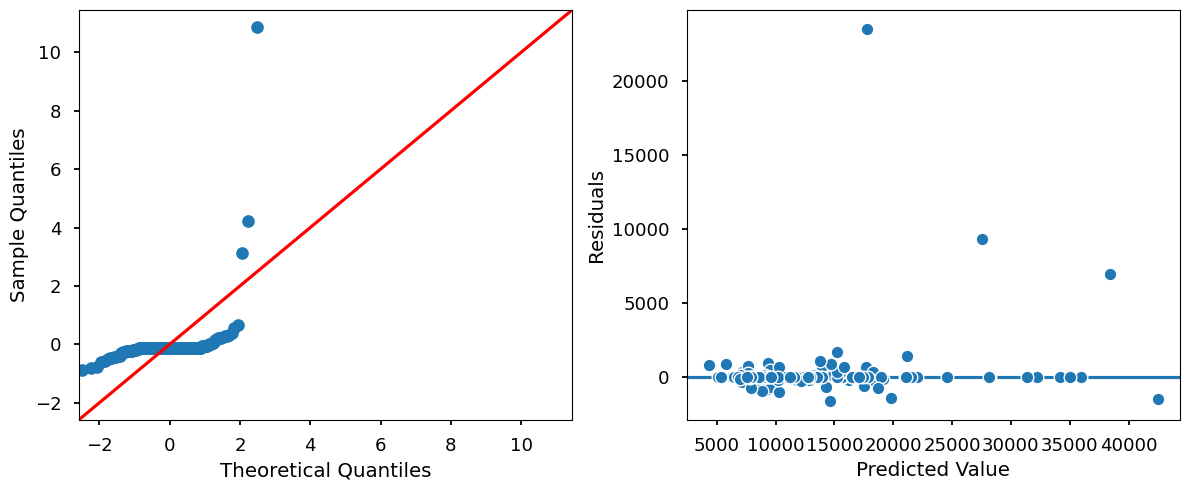

In [55]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

### Fit and Diagnose a New Model with Outliers Removed

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     32.36
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.19e-10
Time:                        17:27:56   Log-Likelihood:                -1101.1
No. Observations:                 149   AIC:                             2466.
Df Residuals:                      17   BIC:                             2863.
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

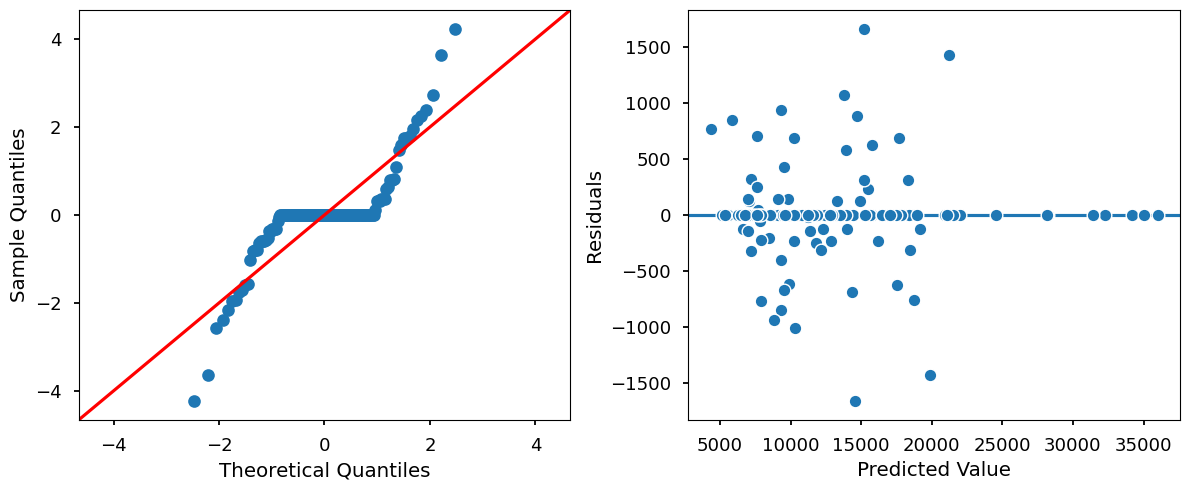

In [56]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train_cln,X_train_cln)
result = model.fit()
print(result.summary())
evaluate_ols(result,X_train_cln,y_train_cln)

## Final Diagnostic Step: Remove Columns with Insignificant P-Values

In [57]:
## save p-values
p_vals = result.pvalues
## filter for p_values that are >.05
p_vals[p_vals>.05]

CarName_alfa-romero stelvio        0.965056
CarName_audi fox                   0.798548
CarName_bmw x5                     0.210385
CarName_buick century special      0.087712
CarName_buick opel isuzu deluxe    0.845196
                                     ...   
fuelsystem_mpfi                    0.474311
fuelsystem_spdi                    0.172131
fuelsystem_spfi                    0.970954
carwidth                           0.374196
highwaympg                         0.905589
Length: 98, dtype: float64

In [58]:
## so how many CarName columns do we have overall? 
# use a list comprehension to filter out column sthat start with zipcode
CarName_cols = [col for col in X_train_df.columns if col.startswith('CarName')]
## preview first few zipcode cols to confirm
CarName_cols[:3]

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls']

In [59]:
len(CarName_cols)



116

In [63]:
## So how many total coeffs are insig?
len(p_vals[p_vals>.05])

98

- I got stuck here, I need to fund the length of p_vals insignificant of just carname and each other type 

### Evaluating the Model on the Testing Data

R-Squared for Test Data: 0.43


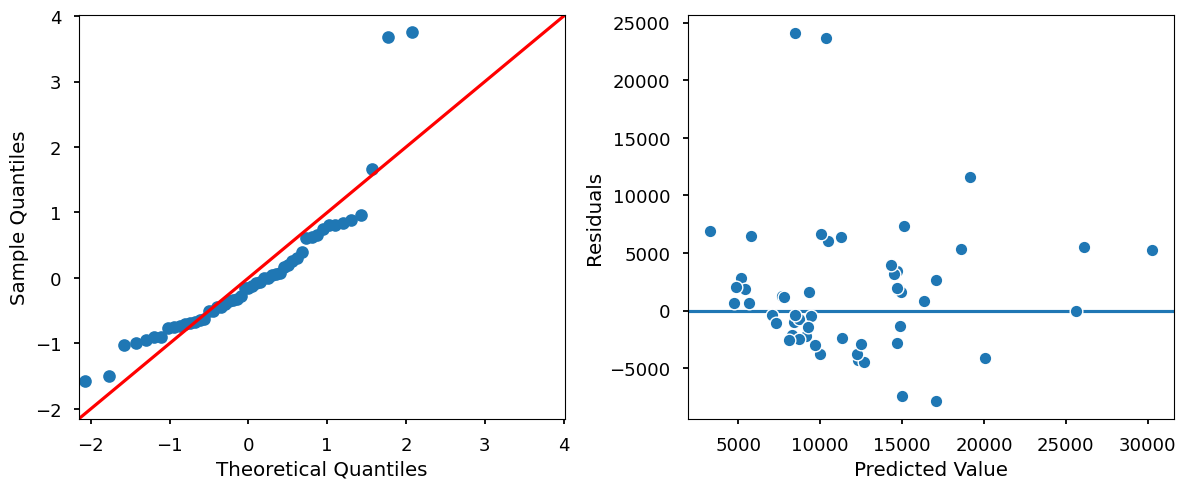

In [64]:
## evaluate test
r2_test = r2_score(y_test_cln, result.predict(X_test_cln))
print(f"R-Squared for Test Data: {r2_test:.2f}")
evaluate_ols(result,X_test_cln, y_test_cln)

- THis looks overfit since the test r2 is way lower than the training score. 

## Saving Model for later

In [65]:
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_cln,
         'y_train':y_train_cln,
         'X_test':X_test_cln,
         'y_test':y_test_cln,
          'Outlier Scaler':scaler,
          'Column Transformer':preprocessor,
         'OLS Results': result}

In [66]:
import joblib
joblib.dump(export, 'ols_results.joblib')

['ols_results.joblib']

In [67]:
import joblib
loaded_data = joblib.load('ols_results.joblib')
loaded_data.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'Outlier Scaler', 'Column Transformer', 'OLS Results'])